# Partie sur la prediction des données

## Classification des elections du premier tour 2022

## Attention pour LCA dans des cas exceptionnels, les entrainements target_names peut ne plus correspondre aux predictions, nous vous invitons a supprimer , target_names=target_names ou relancer le code

### Bibliotheque 

In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from tensorflow.keras.utils import to_categorical

### Préparation des données

In [2]:
#Preparation des données pour les entrainements

df_concat = pd.read_excel('Commune.xlsx')
df_concat = df_concat.sample(frac=1, random_state=42)
    
# Sélection des features
features = df_concat.drop(['COM','Macron', 'Lepen', 'Abstentions','ABSTENTIONS', 'ARTHAUD', 'ROUSSEL', 'MACRON', 'LASSALLE', 'LEPEN', 'ZEMMOUR', 'MÉLENCHON', 'HIDALGO', 'JADOT', 'PÉCRESSE', 'POUTOU', 'DUPONT-AIGNAN'], axis=1)

Classes = ['ARTHAUD', 'ROUSSEL', 'MACRON', 'LASSALLE', 'LEPEN', 'ZEMMOUR', 'MÉLENCHON', 'HIDALGO', 'JADOT', 'PÉCRESSE', 'POUTOU', 'DUPONT-AIGNAN']
y = df_concat[Classes]

class_mapping = {
    0: 'ARTHAUD',
    1: 'ROUSSEL',
    2: 'MACRON',
    3: 'LASSALLE',
    4: 'LEPEN',
    5: 'ZEMMOUR',
    6: 'MÉLENCHON',
    7: 'HIDALGO',
    8: 'JADOT',
    9: 'PÉCRESSE',
    10: 'POUTOU',
    11: 'DUPONT-AIGNAN'
}


# Création du vecteur
max_indices = y.idxmax(axis=1)
target_names = max_indices.unique()
counts = max_indices.value_counts()
print(counts)
#print(target_names)

y = [Classes.index(colonne) for colonne in max_indices]

# Normalisation des données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

LEPEN        18418
MACRON       10631
MÉLENCHON     2124
LASSALLE       146
ARTHAUD         12
PÉCRESSE        11
ZEMMOUR         10
ROUSSEL          4
HIDALGO          1
Name: count, dtype: int64


### Selection des Colonnes intéressante 

In [3]:
import statsmodels.api as sm

# Create the logistic regression model
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Convertir les labels en valeurs numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Appliquer le test chi2
chi2_stat, p_values = chi2(X_scaled, y_encoded)

# Get the indices of significant features based on p-values
significant_indices = [i for i, p_value in enumerate(p_values) if p_value < 0.05]
significant_data = X_scaled[:, significant_indices]

# Get the names of significant columns
significant_columns = features.columns[significant_indices]

print("Significant columns:")

#division des données
X_train, X_test, y_train, y_test = train_test_split(significant_data, y, test_size=0.2, random_state=42)

target_names = [class_mapping[label] for label in np.unique(y_test)]

Significant columns:


### Application de SVM, en faisant du copier coller du tp8

In [4]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred_linear)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

     ROUSSEL       0.00      0.00      0.00         2
      MACRON       0.71      0.74      0.73      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.84      0.90      0.87      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.74      0.23      0.35       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.79      6272
   macro avg       0.29      0.23      0.24      6272
weighted avg       0.79      0.79      0.78      6272

Corrélation entre les valeurs réelles et prédites : 0.46415011859187505
P-value associée : 0.0
R-value : 0.025065315256219467


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
svm_linear = SVC(kernel='poly')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred_linear)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

     ROUSSEL       0.00      0.00      0.00         2
      MACRON       0.73      0.70      0.72      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.83      0.91      0.87      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.78      0.29      0.43       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.80      6272
   macro avg       0.29      0.24      0.25      6272
weighted avg       0.79      0.80      0.78      6272

Corrélation entre les valeurs réelles et prédites : 0.4816936403517493
P-value associée : 0.0
R-value : 0.07064543093075648


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#trop lent car fait toutes les combinaisons

"""from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Meilleurs paramètres pour SVM:", grid_search.best_params_)
print("Performance du SVM avec les meilleurs paramètres :")
print(classification_report(y_test, y_pred_best, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred_linear)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_linear))

"""

'from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\'C\': [0.1, 1, 10, 100], \'gamma\': [0.001, 0.01, 0.1, 1]}\ngrid_search = GridSearchCV(SVC(), param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\nbest_svm = grid_search.best_estimator_\ny_pred_best = best_svm.predict(X_test)\nprint("Meilleurs paramètres pour SVM:", grid_search.best_params_)\nprint("Performance du SVM avec les meilleurs paramètres :")\nprint(classification_report(y_test, y_pred_best, target_names=target_names))\n\ncorrelation, p_value = pearsonr(y_test, y_pred_linear)\nprint("Corrélation entre les valeurs réelles et prédites :", correlation)\nprint("P-value associée :", p_value)\nprint("R-value :", r2_score(y_test, y_pred_linear))\n\n'

### Application de Regression

In [7]:
# régression logistique
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

     ROUSSEL       0.00      0.00      0.00         2
      MACRON       0.73      0.74      0.73      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.84      0.90      0.87      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.69      0.32      0.44       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.80      6272
   macro avg       0.28      0.24      0.25      6272
weighted avg       0.79      0.80      0.79      6272

Corrélation entre les valeurs réelles et prédites : 0.49528213539332133
P-value associée : 0.0
R-value : 0.06968584954813462


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [8]:
# Classifier using Ridge regression
from sklearn.linear_model import RidgeClassifier

ridgeClf = RidgeClassifier()
ridgeClf.fit(X_train, y_train)

y_pred = ridgeClf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

     ROUSSEL       0.00      0.00      0.00         2
      MACRON       0.72      0.71      0.71      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.82      0.92      0.87      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.89      0.09      0.17       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.79      6272
   macro avg       0.30      0.21      0.22      6272
weighted avg       0.79      0.79      0.76      6272

Corrélation entre les valeurs réelles et prédites : 0.41992784157454566
P-value associée : 1.7811463160011116e-266
R-value : -0.006121079678990116


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.linear_model import SGDClassifier
#Linear classifiers (SVM, logistic regression, etc.) with SGD training.

sgdClf = SGDClassifier()
sgdClf.fit(X_train, y_train)

y_pred = sgdClf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

     ROUSSEL       0.00      0.00      0.00         2
      MACRON       0.71      0.74      0.72      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.84      0.90      0.87      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.85      0.10      0.17       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.79      6272
   macro avg       0.30      0.22      0.22      6272
weighted avg       0.79      0.79      0.77      6272

Corrélation entre les valeurs réelles et prédites : 0.4256623880570381
P-value associée : 1.6054446728068972e-274
R-value : -0.01763605627045206


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Application de Foret aléatoire

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=1000, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_forest = forest_model.predict(X_test)

print(classification_report(y_test, y_pred_forest, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred_forest)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_forest))

              precision    recall  f1-score   support

     ROUSSEL       0.00      0.00      0.00         2
      MACRON       0.72      0.73      0.73      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.84      0.90      0.87      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.73      0.36      0.48       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.80      6272
   macro avg       0.29      0.25      0.26      6272
weighted avg       0.79      0.80      0.79      6272

Corrélation entre les valeurs réelles et prédites : 0.496977517784679
P-value associée : 0.0
R-value : 0.07064543093075648


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Reseau de neuronne

In [11]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np

X_trainNN = np.array(X_train)
y_trainNN = np.array(y_train)

num_classes = len(Classes)
y_trainNN = to_categorical(y_trainNN, num_classes=num_classes)
y_testNN = to_categorical(y_test, num_classes=num_classes)
print(y_trainNN)
print(len(significant_columns))

X_valNN, X_testNN = train_test_split(X_test, test_size=0.5, random_state=42)
y_valNN, y_testNN = train_test_split(y_testNN, test_size=0.5, random_state=42)

X_valNN = np.array(X_valNN)
y_valNN = np.array(y_valNN)

X_testNN = np.array(X_testNN)
y_testNN = np.array(y_testNN)

CallBackSave = callbacks.ModelCheckpoint("best_model_classification.keras", 
                                         monitor='val_loss', 
                                         save_best_only=True, 
                                         mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=70)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(significant_columns), activation='relu'),
    tf.keras.layers.Dense(int(len(significant_columns)*3/4), activation='relu'),
    tf.keras.layers.Dense(int(len(significant_columns)/2), activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])     

print("Shape of X_trainNN:", X_trainNN.shape)
print("Shape of y_trainNN:", y_trainNN.shape)
print("Shape of X_valNN:", X_valNN.shape)
print("Shape of y_valNN:", y_valNN.shape)
print("Shape of y_testNN:", y_testNN.shape)


history = model.fit(X_trainNN, y_trainNN,
                    epochs=1000,validation_data=(X_valNN, y_valNN),
                    callbacks=[CallBackSave,callbackStop]
                   )


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
17
Shape of X_trainNN: (25085, 17)
Shape of y_trainNN: (25085, 12)
Shape of X_valNN: (3136, 17)
Shape of y_valNN: (3136, 12)
Shape of y_testNN: (3136, 12)
Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.5824 - loss: 1.2923 - val_accuracy: 0.7580 - val_loss: 0.6182
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.7769 - loss: 0.5896 - val_accuracy: 0.7679 - val_loss: 0.5834
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.7826 - loss: 0.5702 - val_accuracy: 0.7704 - val_loss: 0.5743
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7866 - loss: 0.5550 - val_accuracy: 0.7720 - val_loss: 0.5686
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.7860 - loss: 0.5547 - val_accuracy: 0.7695 - val_loss: 0.5610
Epoch 6/1000
784/784 ━━━━━━━━

784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8004 - loss: 0.4791 - val_accuracy: 0.7905 - val_loss: 0.4998
Epoch 98/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8025 - loss: 0.4853 - val_accuracy: 0.7905 - val_loss: 0.4980
Epoch 99/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8065 - loss: 0.4743 - val_accuracy: 0.7857 - val_loss: 0.5020
Epoch 100/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.8050 - loss: 0.4816 - val_accuracy: 0.7911 - val_loss: 0.5000
Epoch 101/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8050 - loss: 0.4726 - val_accuracy: 0.7902 - val_loss: 0.5008
Epoch 102/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8084 - loss: 0.4766 - val_accuracy: 0.7911 - val_loss: 0.5027
Epoch 103/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8052 - loss: 0.4783 - val_accuracy: 0.7899 - val_loss: 0.5064
Epoch 104/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8030 - 

Epoch 146/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8013 - loss: 0.4838 - val_accuracy: 0.7911 - val_loss: 0.4975
Epoch 147/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8041 - loss: 0.4798 - val_accuracy: 0.7937 - val_loss: 0.5004
Epoch 148/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8057 - loss: 0.4785 - val_accuracy: 0.7918 - val_loss: 0.5008
Epoch 149/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8050 - loss: 0.4758 - val_accuracy: 0.7930 - val_loss: 0.4967
Epoch 150/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8040 - loss: 0.4812 - val_accuracy: 0.7927 - val_loss: 0.4979
Epoch 151/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8062 - loss: 0.4785 - val_accuracy: 0.7876 - val_loss: 0.5000
Epoch 152/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8017 - loss: 0.4793 - val_accuracy: 0.7902 - val_loss: 0.4972
Epoch 153/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - ac

Epoch 195/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8012 - loss: 0.4783 - val_accuracy: 0.7937 - val_loss: 0.4959
Epoch 196/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8082 - loss: 0.4710 - val_accuracy: 0.7927 - val_loss: 0.4952
Epoch 197/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8071 - loss: 0.4680 - val_accuracy: 0.7870 - val_loss: 0.5020
Epoch 198/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8061 - loss: 0.4729 - val_accuracy: 0.7902 - val_loss: 0.4983
Epoch 199/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8023 - loss: 0.4775 - val_accuracy: 0.7905 - val_loss: 0.5003
Epoch 200/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8050 - loss: 0.4724 - val_accuracy: 0.7911 - val_loss: 0.4949
Epoch 201/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8064 - loss: 0.4771 - val_accuracy: 0.7924 - val_loss: 0.4966
Epoch 202/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - ac

Epoch 244/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8018 - loss: 0.4804 - val_accuracy: 0.7908 - val_loss: 0.4958
Epoch 245/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8052 - loss: 0.4705 - val_accuracy: 0.7927 - val_loss: 0.4976
Epoch 246/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8016 - loss: 0.4780 - val_accuracy: 0.7934 - val_loss: 0.4991
Epoch 247/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8052 - loss: 0.4742 - val_accuracy: 0.7930 - val_loss: 0.5094
Epoch 248/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8033 - loss: 0.4743 - val_accuracy: 0.7895 - val_loss: 0.5000
Epoch 249/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8018 - loss: 0.4784 - val_accuracy: 0.7886 - val_loss: 0.5003
Epoch 250/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8075 - loss: 0.4707 - val_accuracy: 0.7927 - val_loss: 0.4963
Epoch 251/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - ac

Epoch 293/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8020 - loss: 0.4784 - val_accuracy: 0.7972 - val_loss: 0.4963
Epoch 294/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8017 - loss: 0.4793 - val_accuracy: 0.7950 - val_loss: 0.4953
Epoch 295/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8083 - loss: 0.4635 - val_accuracy: 0.7908 - val_loss: 0.4986
Epoch 296/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8133 - loss: 0.4567 - val_accuracy: 0.7959 - val_loss: 0.5031
Epoch 297/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8034 - loss: 0.4755 - val_accuracy: 0.7927 - val_loss: 0.5012
Epoch 298/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8047 - loss: 0.4743 - val_accuracy: 0.7915 - val_loss: 0.5022
Epoch 299/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8050 - loss: 0.4789 - val_accuracy: 0.7978 - val_loss: 0.5077
Epoch 300/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - ac

Epoch 342/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8103 - loss: 0.4693 - val_accuracy: 0.7934 - val_loss: 0.5008
Epoch 343/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8084 - loss: 0.4669 - val_accuracy: 0.7950 - val_loss: 0.5018
Epoch 344/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8079 - loss: 0.4631 - val_accuracy: 0.7937 - val_loss: 0.5015
Epoch 345/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8098 - loss: 0.4655 - val_accuracy: 0.7921 - val_loss: 0.5010
Epoch 346/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8082 - loss: 0.4680 - val_accuracy: 0.7927 - val_loss: 0.5000
Epoch 347/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8037 - loss: 0.4702 - val_accuracy: 0.7940 - val_loss: 0.5020
Epoch 348/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8072 - loss: 0.4649 - val_accuracy: 0.7953 - val_loss: 0.5036
Epoch 349/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - ac

In [12]:
best_model = tf.keras.models.load_model("best_model_classification.keras")

y_pred_NN = best_model.predict(X_testNN)
y_pred_class = y_trainNN = to_categorical(np.argmax(y_pred_NN, axis=1), num_classes=num_classes)
print(y_pred_class)
print(y_testNN)
print(classification_report(y_testNN, y_pred_class, target_names=Classes))

correlation, p_value = pearsonr(y_testNN.ravel(), y_pred_class.ravel())
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_testNN, y_pred_class))

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
               precision    recall  f1-score   support

      ARTHAUD       0.00      0.00      0.00         0
      ROUSSEL       0.00      0.00      0.00         0
       MACRON       0.76      0.71      0.73      1048
     LASSALLE       0.00      0.00      0.00        12
        LEPEN       0.85      0.91      0.88      1870
      ZEMMOUR       0.00      0.00      0.00         1
    MÉLENCHON       0.61      0.42      0.49       204
      HIDALGO       0.00      0.00      0.00         1
        JADOT       0.00      0.00      0.00         0
     PÉCRESSE       0.00      0.00      0.00         0
       POUTOU       0.00      0.00      0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


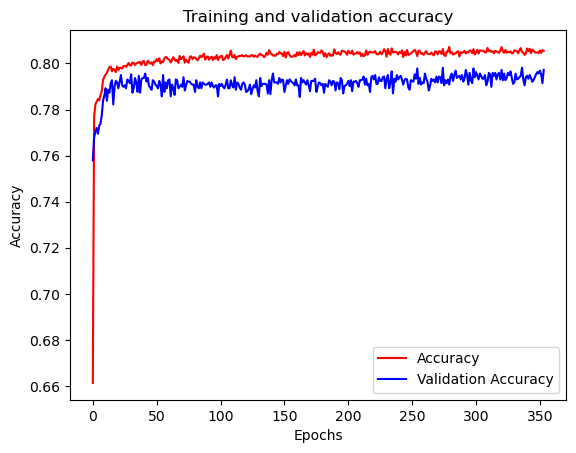

In [13]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = [*range(len(acc))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

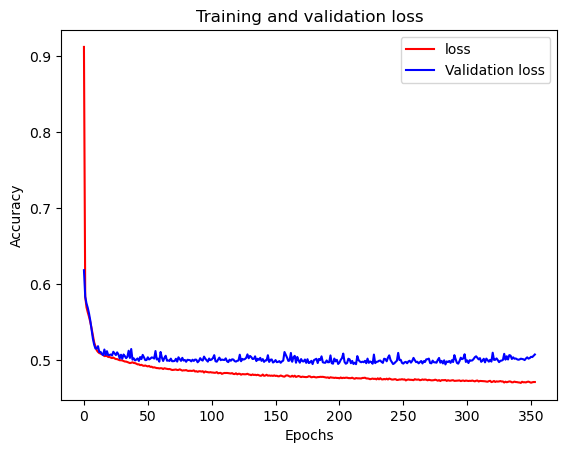

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["loss", "Validation loss"])
plt.show()

### KNN voisin

In [15]:
from sklearn.neighbors import KNeighborsClassifier

acc=0
bestN_neighbors=1

X_valKNN, X_testKNN = train_test_split(X_test, test_size=0.5, random_state=42)
y_valKNN, y_testKNN = train_test_split(y_test, test_size=0.5, random_state=42)


for i in range (1,int(X_testKNN.shape[0]/4),25):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_valKNN)
    matriceConfusion = classification_report(y_valKNN, y_pred, output_dict=True)
    
    macro_avg_precision = matriceConfusion['macro avg']['precision']
    
    if macro_avg_precision > acc:
        bestN_neighbors = i
        acc = macro_avg_precision
        print(bestN_neighbors, " : ", acc)
        
knn_model = KNeighborsClassifier(n_neighbors=bestN_neighbors)
knn_model.fit(X_train, y_train)

target_names_KNN = [class_mapping[label] for label in np.unique(y_testKNN)]

y_pred = knn_model.predict(X_testKNN)
print(classification_report(y_testKNN, y_pred, target_names=target_names_KNN))

correlation, p_value = pearsonr(y_testKNN, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_testKNN, y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

1  :  0.25454884540410855
26  :  0.33717827042375526


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

101  :  0.33755066751913143


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


126  :  0.3402121244537419


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


151  :  0.3450200437811765


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


176  :  0.34606192295579624


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

226  :  0.3475158711196458


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

376  :  0.35136672901938354


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

551  :  0.356894117970766


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

651  :  0.3569150071860371


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

              precision    recall  f1-score   support

      MACRON       0.71      0.71      0.71      1048
    LASSALLE       0.00      0.00      0.00        12
       LEPEN       0.83      0.93      0.87      1870
     ZEMMOUR       0.00      0.00      0.00         1
   MÉLENCHON       1.00      0.03      0.06       204
     HIDALGO       0.00      0.00      0.00         1

    accuracy                           0.79      3136
   macro avg       0.42      0.28      0.27      3136
weighted avg       0.80      0.79      0.76      3136

Corrélation entre les valeurs réelles et prédites : 0.37905979997325157
P-value associée : 1.0233955928548511e-107
R-value : -0.06837827377112649


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LCA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

     ROUSSEL       0.25      0.50      0.33         2
      MACRON       0.73      0.71      0.72      2096
    LASSALLE       0.00      0.00      0.00        29
       LEPEN       0.84      0.89      0.86      3719
     ZEMMOUR       0.00      0.00      0.00         3
   MÉLENCHON       0.61      0.39      0.47       421
     HIDALGO       0.00      0.00      0.00         1
    PÉCRESSE       0.00      0.00      0.00         1

    accuracy                           0.79      6272
   macro avg       0.30      0.31      0.30      6272
weighted avg       0.78      0.79      0.79      6272

Corrélation entre les valeurs réelles et prédites : 0.47712958793756544
P-value associée : 0.0
R-value : -0.012238410993204107


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### PCA

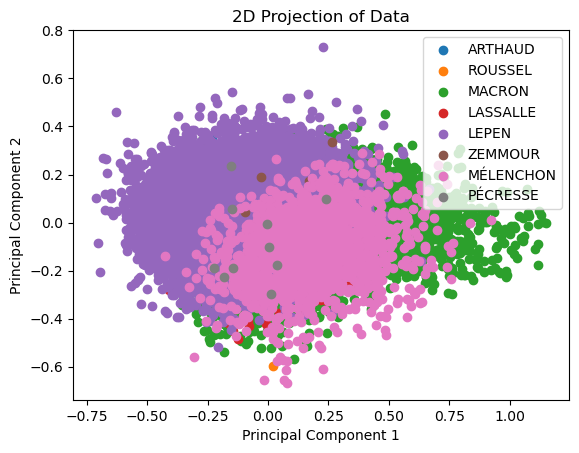

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


plt.figure()
classes = np.unique(y_train)
for class_label in classes:
    indices = y_train == class_label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=class_mapping[class_label])

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data')
plt.show()